# Detecting Pneumonia through X-ray Images with Convolutional Neural Networks in Keras and Back-end Tensorflow

Written by: Udbhav Prasad <br>
Linkedin: https://www.linkedin.com/in/udbhav-prasad-1506b7192/ <br>
HackerRank: https://www.hackerrank.com/uprasad1 <br>
Github: https://github.com/UdbhavPrasad072300 <br>
Computer Science Co-op - Ryerson University <br> <hr>
Making a Convolutional Neural Network with Keras and back-end Tensorflow to detect whether someone has pneumonia based on an X-ray scan of their chest <br>
An accuracy of <b>96%</b> was achieved for Training Set & <br>
An accuracy of <b>90%</b> was achieved for Validation Set 

## Importing Modules

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## Checking if GPU is being used by Tensorflow

My CPU: Intel(R) Core(TM) i7-8700K CPU @ 3.70GHz, 3696 Mhz, 6 Core(s), 12 Logical Processor(s) <br>
My GPU: NVIDIA GeForce GTX 1080 8GB Dedicated Memory

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15043386031989147291
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6657650197
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5262185982309028731
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


## Initialising the Convolutional Neural Network

In [3]:
#strategy = tf.distribute.MirroredStrategy(devices=None, cross_device_ops=None)

#with strategy.scope():
classifier = Sequential()

## Adding Layers to Neural Network

First Convolutional Layer

In [4]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu')) # Step 1 - Convolution
classifier.add(MaxPooling2D(pool_size = (2, 2))) # Step 2 - Pooling

Second Convolutional Layer

In [5]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu')) # Step 1 - Convolution
classifier.add(MaxPooling2D(pool_size = (2, 2))) # Step 2 - Pooling

Flattening Layer <br>
Turns into 1 dimension for input layer

In [6]:
classifier.add(Flatten())

Arificial Neural Network

In [7]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

## Compiling Convolutional Neural Network 

In [8]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Fitting Images to Convolutional Neural Network 

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Summary of the Layers and Characteristics of the Convolutional Neural Network

In [11]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

## Training the Network with Data

Steps per epoch: 250 <br>
Num. of epochs: 15 <br>

In [12]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 250,
                         epochs = 15,
                         validation_data = test_set,
                         validation_steps = 200)

Epoch 1/15
250/250 [==============================] - 149s 598ms/step - loss: 0.3224 - accuracy: 0.8602 - val_loss: 0.7070 - val_accuracy: 0.8349
Epoch 2/15
250/250 [==============================] - 147s 586ms/step - loss: 0.2066 - accuracy: 0.9151 - val_loss: 0.8791 - val_accuracy: 0.8878
Epoch 3/15
250/250 [==============================] - 147s 590ms/step - loss: 0.1885 - accuracy: 0.9236 - val_loss: 0.4848 - val_accuracy: 0.9054
Epoch 4/15
250/250 [==============================] - 148s 591ms/step - loss: 0.1668 - accuracy: 0.9375 - val_loss: 0.2572 - val_accuracy: 0.9006
Epoch 5/15
250/250 [==============================] - 147s 589ms/step - loss: 0.1498 - accuracy: 0.9436 - val_loss: 0.0839 - val_accuracy: 0.9103
Epoch 6/15
250/250 [==============================] - 147s 589ms/step - loss: 0.1422 - accuracy: 0.9446 - val_loss: 0.1573 - val_accuracy: 0.8990
Epoch 7/15
250/250 [==============================] - 148s 593ms/step - loss: 0.1347 - accuracy: 0.9504 - val_loss: 0.3816 -

Just checking the GPU

In [13]:
tf.test.gpu_device_name()

'/device:GPU:0'

Returns a dictionary of the Configuration of the Classifier

In [14]:
classifier.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'conv2d_1',
    'trainable': True,
    'batch_input_shape': (None, 64, 64, 3),
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d_1',
    'trainable': True,
    'dtype': 'float32',
    'pool_size': (2, 2),
    'padding': 'valid',
    'strides': (2, 2),
    'data_format': 'cha

If you wanna see some of the trained weights of the Classifier

In [15]:
#from itertools import islice
#print(*islice(classifier.get_weights(), 1))

## Saving the Classifier for Later Use

In [16]:
classifier.save("pneumoniaDetector.h5")
print("Saved model to disk")

Saved model to disk


## Loading in the Model just to confirm that it actually works

In [17]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

model = load_model("pneumoniaDetector.h5")
test_image = image.load_img("person2_bacteria_4.jpeg", target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = "OMG YOU HAVE PNEUMONIA" 
else:
    prediction = "you good man, dw"
print(prediction) # Expected: "OMG YOU HAVE PNEUMONIA"

OMG YOU HAVE PNEUMONIA


## Analyzing the History of the Trained Convolutional Neural Network [Accuracy & Validation Accuracy]

Validation Test Set Accuracy and the Training Set

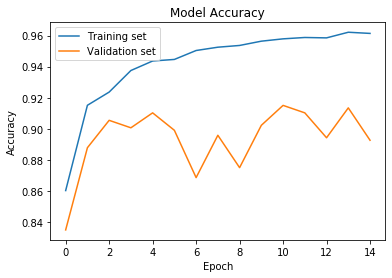

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'])
plt.show()

## Conclusion

Test Set ended with an Accuracy of 97.27% on Training Set and 91.03% on Validation Set

## Improvements that can be made

Adding more convolutional layers would have helped because images were very high resolution

And obviously training with more epochs 